<a href="https://colab.research.google.com/github/jose-luis433/Java/blob/main/jose_FIFAPractica3_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [ ]:
# pandas usando el alias pd
import pandas as pd


Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [ ]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1955k  100 1955k    0     0  4173k      0 --:--:-- --:--:-- --:--:-- 4178k


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [ ]:
!head -n 3 players.csv

ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86,41,87,80,96,95,11
20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88,41,81,86,84,91,12


## Carga el conjunto de datos FIFA usando pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
# leer el dataframe usando read_csv
fifa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df = fifa[fifa['Nationality'] == 'Mexico']
fifa_df.to_csv('jugadores_mexicanos.csv', index=False)
fifa_df.head(5)
#print(jugadores_mexicanos)
#fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
306,171897,A. Guardado,Mexico,Real Betis,18.0,€19M,€35K,31,5'7,148lbs,...,CM,82,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0
329,221992,H. Lozano,Mexico,PSV,22.0,€24M,€22K,22,5'9,154lbs,...,LS,81,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0
371,193165,J. Corona,Mexico,FC Porto,17.0,€21.5M,€18K,25,5'8,137lbs,...,RM,81,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0
397,169416,C. Vela,Mexico,Los Angeles FC,10.0,€17.5M,€15K,29,5'10,170lbs,...,RW,81,81,76.0,37.0,75.0,76.0,82.0,80.0,11.0
406,156519,H. Herrera,Mexico,FC Porto,16.0,€17.5M,€20K,28,6'0,159lbs,...,CM,81,81,67.0,78.0,72.0,73.0,75.0,77.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [54]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64


¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [57]:
m,n = fifa_df.shape
print("Filas:", m)
print("Columnas:", n)

Filas: 366
Columnas: 21


In [58]:
assert m == 366 and n == 21, "Error en las dimensiones"

### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [59]:
fifa_df.describe()

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,366.000000,365.000000,366.000000,366.000000,366.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,214831.573770,23.684932,24.319672,65.418033,71.508197,47.487671,48.027397,54.435616,63.531507,59.282192,56.547945,17.243836
std,27607.257081,22.350650,4.797145,6.134350,4.997390,15.164953,17.360411,14.830706,9.253584,14.797157,9.409256,18.071234
min,139213.000000,1.000000,17.000000,50.000000,57.000000,11.000000,10.000000,14.000000,35.000000,16.000000,32.000000,6.000000
25%,192002.500000,9.000000,20.000000,61.000000,68.000000,40.000000,36.000000,48.000000,59.000000,55.000000,50.000000,10.000000
50%,222644.000000,20.000000,23.000000,65.000000,72.000000,51.000000,55.000000,58.000000,64.000000,64.000000,57.000000,11.000000
75%,239625.250000,28.000000,28.000000,70.000000,75.000000,58.000000,61.000000,65.000000,70.000000,69.000000,64.000000,12.000000
max,246294.000000,99.000000,45.000000,82.000000,86.000000,76.000000,78.000000,80.000000,81.000000,87.000000,81.000000,76.000000


## Tratamiento de datos


Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes.

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [60]:
fifa_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,1,0,0,0,1,1,...,1,0,0,1,1,1,1,1,1,1


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [61]:
t_df = fifa_df.dropna(axis=0)

In [62]:
t_df

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
306,171897,A. Guardado,Mexico,Real Betis,18.0,€19M,€35K,31,5'7,148lbs,...,CM,82,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0
329,221992,H. Lozano,Mexico,PSV,22.0,€24M,€22K,22,5'9,154lbs,...,LS,81,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0
371,193165,J. Corona,Mexico,FC Porto,17.0,€21.5M,€18K,25,5'8,137lbs,...,RM,81,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0
397,169416,C. Vela,Mexico,Los Angeles FC,10.0,€17.5M,€15K,29,5'10,170lbs,...,RW,81,81,76.0,37.0,75.0,76.0,82.0,80.0,11.0
406,156519,H. Herrera,Mexico,FC Porto,16.0,€17.5M,€20K,28,6'0,159lbs,...,CM,81,81,67.0,78.0,72.0,73.0,75.0,77.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,244828,R. Gutiérrez,Mexico,Monarcas Morelia,33.0,€80K,€1K,22,5'11,168lbs,...,GK,54,64,11.0,10.0,19.0,36.0,24.0,32.0,55.0
17614,239739,A. Ocejo,Mexico,Santos Laguna,86.0,€90K,€2K,20,5'11,157lbs,...,LM,53,62,49.0,36.0,52.0,50.0,62.0,48.0,9.0
18037,246089,C. Landa,Mexico,Tiburones Rojos de Veracruz,34.0,€50K,€1K,19,6'0,174lbs,...,CM,50,60,40.0,51.0,51.0,61.0,51.0,48.0,8.0
18068,240286,J. García,Mexico,Santos Laguna,92.0,€40K,€1K,20,6'1,159lbs,...,GK,50,62,12.0,12.0,19.0,37.0,24.0,34.0,51.0


In [63]:
t_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0




Verifica que no hay más datos faltantes:

In [64]:
empty_columns = t_df.isna().sum(axis=0).to_frame().T
empty_columns

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [66]:
fifa_df = t_df
print("Nuevos datos", fifa_df.shape)

Nuevos datos (365, 21)


### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis.

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones).

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [67]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count()

,Wage
Wage,
K,365


Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [68]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()


,Value
Value,
K,248
M,117


In [69]:
def currency_to_numeric(currency):
  """
  La funcion recibe valores monetarios en un objeto de texto, los tranforma:
  1- Elimina el simbolo de la moneda al inicio de la cadena
  2- Extrae el caracter adicional al final de la cadena que indica el
     multiplo de la cantidad (abreviatura). No siempre hay un simbolo.
  3- Usa el valor para devolver la cantidad en numero (multiplica por el valor).
  Ej: 250K pasa a 250000
  ya que
  1K = 1000
  1M = 1000000
  Sin letra solo parte numerica
  """
  # el multiplo de K o M
  symbols = {"K": 1000, "M": 1000000} # este es un diccionario
  #print("Currency: ", currency)
  # Actualiza el valor de numeric con la cantidad en currency
  numeric = 0.0
  val1= currency[-1] #es  el último elemento
  val2= currency[1:] #corta el primer elemento

  if val1 in symbols:
   numeric = float(val2[:-1])*symbols[val1]
  else:
   numeric = float(val2)
  #print("Valor: ", numeric)

  return numeric

In [70]:
#probar
cadenavalor="110.5"
valor = currency_to_numeric(cadenavalor)
print(cadenavalor[-1], valor)


5 10.5


Prueba tu función:

In [71]:
currency_to_numeric("$230")

230.0

In [72]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas ```Wage``` y ```Value``` a numéricos usando ```currency_to_numeric``` elemento por elemento con ```applymap```:

In [73]:
fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)
fifa_df.head()

<ipython-input-73-3b686f337a03>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)


,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
306,171897,A. Guardado,Mexico,Real Betis,18.0,19000000.0,35000.0,31,5'7,148lbs,...,CM,82,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0
329,221992,H. Lozano,Mexico,PSV,22.0,24000000.0,22000.0,22,5'9,154lbs,...,LS,81,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0
371,193165,J. Corona,Mexico,FC Porto,17.0,21500000.0,18000.0,25,5'8,137lbs,...,RM,81,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0
397,169416,C. Vela,Mexico,Los Angeles FC,10.0,17500000.0,15000.0,29,5'10,170lbs,...,RW,81,81,76.0,37.0,75.0,76.0,82.0,80.0,11.0
406,156519,H. Herrera,Mexico,FC Porto,16.0,17500000.0,20000.0,28,6'0,159lbs,...,CM,81,81,67.0,78.0,72.0,73.0,75.0,77.0,11.0


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador.


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [74]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0   3808      0 --:--:-- --:--:-- --:--:--  3802


Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [75]:
positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.head(10)

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back
5,FB,Full Back
6,LB,Left Back
7,RB,Right Back
8,WB,Wing Back
9,RWB,Right Wing Back


Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [76]:
merged_df = fifa_df.merge(positions_df, how="inner", left_on="Position", right_on="Abbreviation")

In [77]:
merged_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Abbreviation,Full
0,171897,A. Guardado,Mexico,Real Betis,18.0,19000000.0,35000.0,31,5'7,148lbs,...,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0,CM,Central Midfield
1,221992,H. Lozano,Mexico,PSV,22.0,24000000.0,22000.0,22,5'9,154lbs,...,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0,LS,Left Side
2,193165,J. Corona,Mexico,FC Porto,17.0,21500000.0,18000.0,25,5'8,137lbs,...,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0,RM,Right Midfielder
3,169416,C. Vela,Mexico,Los Angeles FC,10.0,17500000.0,15000.0,29,5'10,170lbs,...,81,76.0,37.0,75.0,76.0,82.0,80.0,11.0,RW,Right Wing
4,156519,H. Herrera,Mexico,FC Porto,16.0,17500000.0,20000.0,28,6'0,159lbs,...,81,67.0,78.0,72.0,73.0,75.0,77.0,11.0,CM,Central Midfield


In [78]:
merged_df[['Position','Full', 'Abbreviation']]

,Position,Full,Abbreviation
0,CM,Central Midfield,CM
1,LS,Left Side,LS
2,RM,Right Midfielder,RM
3,RW,Right Wing,RW
4,CM,Central Midfield,CM
...,...,...,...
360,GK,Goalkeeper,GK
361,LM,Left Midfielder,LM
362,CM,Central Midfield,CM
363,GK,Goalkeeper,GK


In [79]:
assert len(merged_df.columns) == 23, "Error"
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

La union de ambos dataframes contiene  23  columnas


In [80]:
positions_df.shape

(36, 2)

Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [82]:
merged_df["Position"] = merged_df["Full"] + " (" + merged_df["Position"] +")"

Muestra la columna actualizada:

In [81]:
merged_df["Position"].head(15)

,Position
0,CM
1,LS
2,RM
3,RW
4,CM
5,ST
6,RS
7,LM
8,LM
9,LCM


Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [83]:
merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)

In [84]:
merged_df.head(6)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,171897,A. Guardado,Mexico,Real Betis,18.0,19000000.0,35000.0,31,5'7,148lbs,...,Central Midfield (CM),82,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0
1,221992,H. Lozano,Mexico,PSV,22.0,24000000.0,22000.0,22,5'9,154lbs,...,Left Side (LS),81,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0
2,193165,J. Corona,Mexico,FC Porto,17.0,21500000.0,18000.0,25,5'8,137lbs,...,Right Midfielder (RM),81,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0
3,169416,C. Vela,Mexico,Los Angeles FC,10.0,17500000.0,15000.0,29,5'10,170lbs,...,Right Wing (RW),81,81,76.0,37.0,75.0,76.0,82.0,80.0,11.0
4,156519,H. Herrera,Mexico,FC Porto,16.0,17500000.0,20000.0,28,6'0,159lbs,...,Central Midfield (CM),81,81,67.0,78.0,72.0,73.0,75.0,77.0,11.0
5,178224,J. Hernández,Mexico,West Ham United,17.0,12000000.0,90000.0,30,5'9,161lbs,...,Striker (ST),79,79,71.0,37.0,62.0,72.0,76.0,77.0,12.0


In [85]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [86]:
fifa_df = merged_df
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,171897,A. Guardado,Mexico,Real Betis,18.0,19000000.0,35000.0,31,5'7,148lbs,...,Central Midfield (CM),82,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0
1,221992,H. Lozano,Mexico,PSV,22.0,24000000.0,22000.0,22,5'9,154lbs,...,Left Side (LS),81,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0
2,193165,J. Corona,Mexico,FC Porto,17.0,21500000.0,18000.0,25,5'8,137lbs,...,Right Midfielder (RM),81,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0
3,169416,C. Vela,Mexico,Los Angeles FC,10.0,17500000.0,15000.0,29,5'10,170lbs,...,Right Wing (RW),81,81,76.0,37.0,75.0,76.0,82.0,80.0,11.0
4,156519,H. Herrera,Mexico,FC Porto,16.0,17500000.0,20000.0,28,6'0,159lbs,...,Central Midfield (CM),81,81,67.0,78.0,72.0,73.0,75.0,77.0,11.0


## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [91]:
fifa_df.sort_values("Value", ascending=False).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
1,221992,H. Lozano,Mexico,PSV,22.0,24000000.0,22000.0,22,5'9,154lbs,...,81,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0,5
2,193165,J. Corona,Mexico,FC Porto,17.0,21500000.0,18000.0,25,5'8,137lbs,...,81,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0,2
0,171897,A. Guardado,Mexico,Real Betis,18.0,19000000.0,35000.0,31,5'7,148lbs,...,82,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0,0
3,169416,C. Vela,Mexico,Los Angeles FC,10.0,17500000.0,15000.0,29,5'10,170lbs,...,81,81,76.0,37.0,75.0,76.0,82.0,80.0,11.0,0
4,156519,H. Herrera,Mexico,FC Porto,16.0,17500000.0,20000.0,28,6'0,159lbs,...,81,81,67.0,78.0,72.0,73.0,75.0,77.0,11.0,0


Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [92]:
fifa_df.sort_values("Wage", ascending=False).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
5,178224,J. Hernández,Mexico,West Ham United,17.0,12000000.0,90000.0,30,5'9,161lbs,...,79,79,71.0,37.0,62.0,72.0,76.0,77.0,12.0,0
24,158543,O. Peralta,Mexico,Club América,24.0,3500000.0,56000.0,34,5'10,176lbs,...,75,75,69.0,48.0,65.0,72.0,69.0,75.0,11.0,0
8,192350,J. Aquino,Mexico,Tigres U.A.N.L.,20.0,9000000.0,54000.0,28,5'6,137lbs,...,77,77,63.0,45.0,72.0,78.0,83.0,70.0,11.0,0
14,192012,D. Reyes,Mexico,Fenerbahçe SK,5.0,8500000.0,48000.0,25,6'2,163lbs,...,76,80,48.0,71.0,65.0,65.0,65.0,64.0,10.0,4
25,207444,J. Damm,Mexico,Tigres U.A.N.L.,25.0,8000000.0,44000.0,25,6'1,154lbs,...,75,76,61.0,46.0,67.0,80.0,73.0,67.0,12.0,1


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [93]:
fifa_df[['Potential', 'Overall']].describe()

,Potential,Overall
count,365.000000,365.000000
mean,71.526027,65.427397
std,4.992578,6.140150
min,57.000000,50.000000
25%,68.000000,61.000000
50%,72.000000,65.000000
75%,75.000000,70.000000
max,86.000000,82.000000


In [94]:
fifa_df["Potential left"] = fifa_df['Potential'] - fifa_df['Overall']
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
0,171897,A. Guardado,Mexico,Real Betis,18.0,19000000.0,35000.0,31,5'7,148lbs,...,82,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0,0
1,221992,H. Lozano,Mexico,PSV,22.0,24000000.0,22000.0,22,5'9,154lbs,...,81,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0,5
2,193165,J. Corona,Mexico,FC Porto,17.0,21500000.0,18000.0,25,5'8,137lbs,...,81,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0,2
3,169416,C. Vela,Mexico,Los Angeles FC,10.0,17500000.0,15000.0,29,5'10,170lbs,...,81,81,76.0,37.0,75.0,76.0,82.0,80.0,11.0,0
4,156519,H. Herrera,Mexico,FC Porto,16.0,17500000.0,20000.0,28,6'0,159lbs,...,81,81,67.0,78.0,72.0,73.0,75.0,77.0,11.0,0


### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [95]:
fifa_df[fifa_df['Age']<22].sort_values(by=['Potential','Potential left', 'Overall'], ascending=True).head(5)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
362,246089,C. Landa,Mexico,Tiburones Rojos de Veracruz,34.0,50000.0,1000.0,19,6'0,174lbs,...,50,60,40.0,51.0,51.0,61.0,51.0,48.0,8.0,10
361,239739,A. Ocejo,Mexico,Santos Laguna,86.0,90000.0,2000.0,20,5'11,157lbs,...,53,62,49.0,36.0,52.0,50.0,62.0,48.0,9.0,9
363,240286,J. García,Mexico,Santos Laguna,92.0,40000.0,1000.0,20,6'1,159lbs,...,50,62,12.0,12.0,19.0,37.0,24.0,34.0,51.0,12
349,244904,M. Tapias,Mexico,Pachuca,4.0,120000.0,3000.0,21,5'11,159lbs,...,56,64,35.0,53.0,33.0,61.0,43.0,41.0,10.0,8
352,245359,C. Moreno,Mexico,CD Everton de Viña del Mar,12.0,100000.0,1000.0,20,6'3,205lbs,...,55,64,12.0,10.0,19.0,36.0,20.0,34.0,55.0,9


### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [ ]:
fifa_df['Defense'].idxmax(axis=0)

14

In [ ]:
idx = fifa_df['Defense'].idxmax(axis=0)
fifa_df[["Name", "Club", "Defense", "Position"]].iloc[idx]

,14
Name,N. Kanté
Club,Chelsea
Defense,86.0
Position,Left Defensive Midfielder (LDM)


### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [ ]:
fifa_df['Preferred Foot'].value_counts()

,count
Preferred Foot,
Right,13756
Left,4162


### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [ ]:
import numpy as np

In [ ]:
fifa_df['Overall'].agg(np.mean)

<ipython-input-66-3111c4bc9804>:1: FutureWarning: The provided callable <function mean at 0x7a4bb2788280> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  fifa_df['Overall'].agg(np.mean)


66.23680098225249

### Equipos con más costosos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [ ]:
fifa_df.groupby(['Club'])['Value'].value_counts().unstack(1)

Value,0.0,10000.0,20000.0,30000.0,40000.0,50000.0,60000.0,70000.0,80000.0,90000.0,...,77000000.0,78000000.0,80000000.0,81000000.0,83500000.0,89000000.0,93000000.0,102000000.0,110500000.0,118500000.0
Club,,,,,,,,,,,,,,,,,,,,,
SSV Jahn Regensburg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1. FC Heidenheim 1846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1. FC Kaiserslautern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1. FC Köln,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1. FC Magdeburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zagłębie Sosnowiec,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Çaykur Rizespor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Örebro SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [ ]:
players_mx_df = fifa_df[fifa_df['Nationality']=='Mexico']
players_mx_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
306,171897,A. Guardado,Mexico,Real Betis,18.0,19000000.0,35000.0,31,5'7,148lbs,...,82,82,70.0,73.0,80.0,76.0,84.0,80.0,10.0,0
329,221992,H. Lozano,Mexico,PSV,22.0,24000000.0,22000.0,22,5'9,154lbs,...,81,86,71.0,46.0,72.0,81.0,80.0,76.0,12.0,5
371,193165,J. Corona,Mexico,FC Porto,17.0,21500000.0,18000.0,25,5'8,137lbs,...,81,83,71.0,50.0,72.0,75.0,87.0,81.0,10.0,2


Agrupa por el nombre del club y cuenta:

In [ ]:
players_mx_df.groupby('Club').agg('count')['Nationality'].sort_values(ascending=False).head(5)

,Nationality
Club,
Guadalajara,29
U.N.A.M.,21
Club Atlas,20
Club Necaxa,20
Querétaro,19


## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

*   Elemento de la lista
*   Elemento de la lista



Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

<Axes: ylabel='Frequency'>

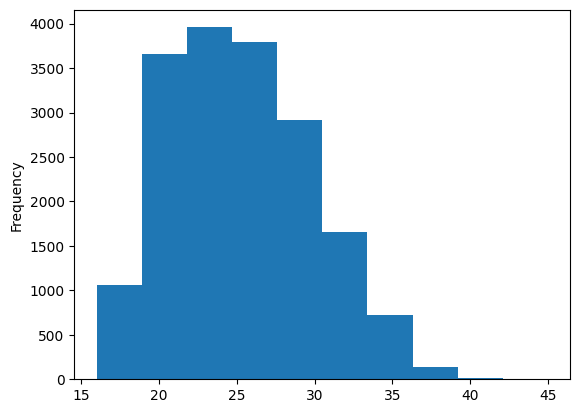

In [ ]:
fifa_df['Age'].plot.hist(bins=10)

### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

<Axes: ylabel='count'>

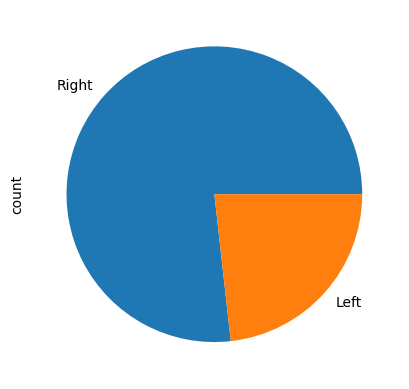

In [ ]:
fifa_df['Preferred Foot'].value_counts().plot.pie()

### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

<Axes: xlabel='Age', ylabel='Potential left'>

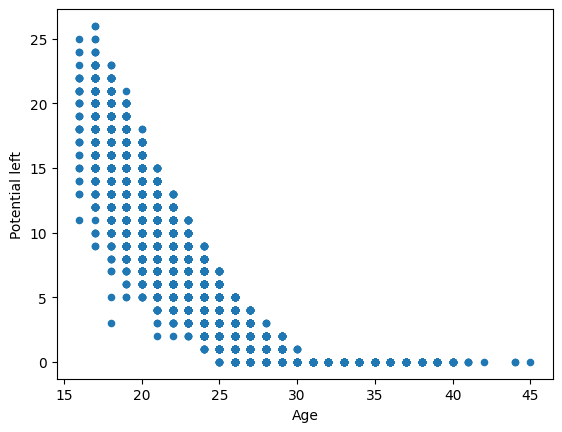

In [ ]:
fifa_df.plot.scatter(x='Age', y='Potential left')

¿Qué otras variables o mezcla de variables sería interesante visualizar?

**Consideramos que podría ser importante graficar LOS CLUBES con jugadores con más potencial, y compararlo con los jóvenes promesas. Y así, muchas otras.**



# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano.

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades?

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```